In [107]:
#Import Stuff
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt
import math
import random
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn import feature_selection
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (8,8)


In [12]:
#Credit Data
df1 = pd.read_csv("credit_risk_dataset.csv")
df1.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [13]:
#Real Estate
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h3>PROBLEM 1 - Solution: Linear Regression - Real Estate Data: Sales Price</h3>
<h2>Step 1 - Clean Data and do some EDA</h2>

In [85]:
#Checking to see the data types for our data
#df.info()
#Setting the object type data to categotical type
df["TAX CLASS AT TIME OF SALE"] = df["TAX CLASS AT TIME OF SALE"].astype("category")
df["BUILDING CLASS AT TIME OF SALE"] = df["BUILDING CLASS AT TIME OF SALE"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         48248 non-null  int64   
 1   BLOCK                           48248 non-null  int64   
 2   LOT                             48248 non-null  int64   
 3   ZIP CODE                        48248 non-null  int64   
 4   RESIDENTIAL UNITS               48248 non-null  int64   
 5   TOTAL UNITS                     48248 non-null  int64   
 6   GROSS SQUARE FEET               48248 non-null  int64   
 7   YEAR BUILT                      48248 non-null  int64   
 8   TAX CLASS AT TIME OF SALE       48248 non-null  category
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  category
 10  SALE PRICE                      48248 non-null  int64   
dtypes: category(2), int64(9)
memory usage: 3.5 MB


In [86]:
#Checking for non numerical values and droping droping them
df.isna().sum() #(We do not have non numerical values)

BOROUGH                           0
BLOCK                             0
LOT                               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

In [118]:
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<AxesSubplot:>

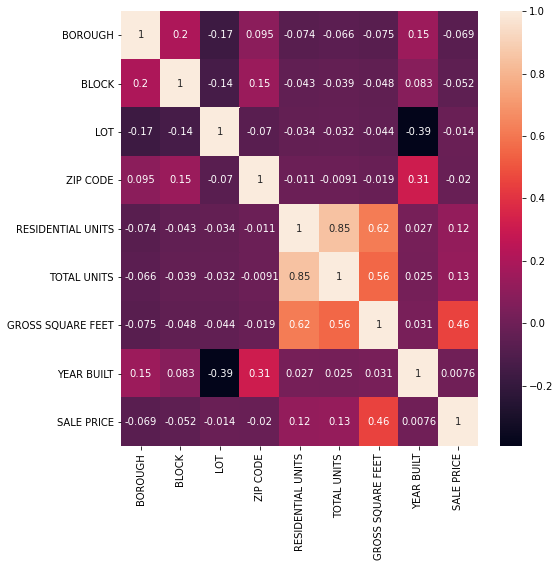

In [121]:
sns.heatmap(df.corr(), annot=True)

<h2>Step 2 - Doing the Linear Regression</h2>

<l1> From the heat map above, we see that the variable with the highest correlation with Sales price is the <b>GROSS SQUARE FEET<b>.

<l1>So we are going to try to predict <b>SALES PRICE<b> using gross square feet as our independent variable (x)

In [127]:
dfboth = df[["SALE PRICE", "GROSS SQUARE FEET"]]
GSF = "GROSS SQUARE FEET"
SP = "SALE PRICE"


In [131]:
#fitting our data into the right shape
xn = np.array(dfboth[GSF]).reshape(-1,1)
yn = np.array(dfboth[SP]).reshape(-1,1)
xn.shape, yn.shape

((48248, 1), (48248, 1))

In [132]:
#Creating an instance of our Linear Regression Model
modelx = LinearRegression().fit(xn, yn) 

In [133]:
#Get the results of generating the model

r_sq = modelx.score(xn, yn)
print('Coefficient of determination :', r_sq)
print()
print('Intercept:', modelx.intercept_[0])
print()
print('Slope:', modelx.coef_[0][0]) 

Coefficient of determination : 0.20741035864209534

Intercept: 394960.2080082777

Slope: 207.1083076612282


<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

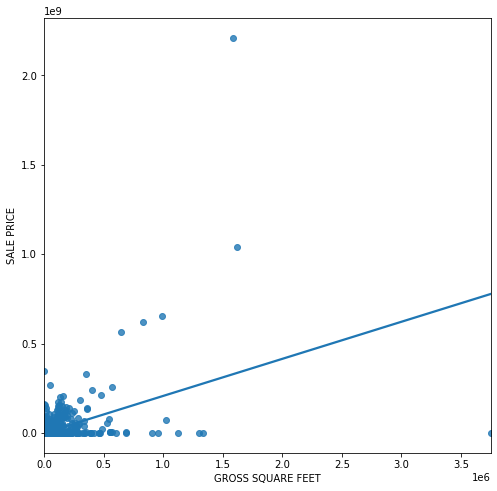

In [134]:
#graphing our fit line
sns.regplot(x=df["GROSS SQUARE FEET"], y=df["SALE PRICE"], ci=0)

<AxesSubplot:xlabel='GROSS SQUARE FEET', ylabel='SALE PRICE'>

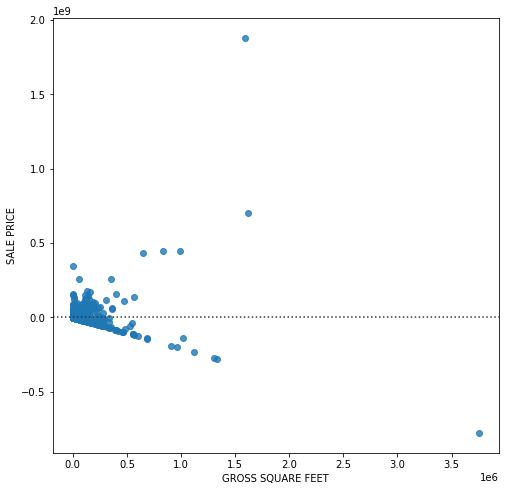

In [136]:
sns.residplot(x=df["GROSS SQUARE FEET"], y=df["SALE PRICE"])

<h3>>>>>Is the Model good?</h3>

<b>NO THIS MODEL IS NOT GOOD<b>
</ul>
Reasons:
<li> - There's no strong enough correlation between the independent variable (x - Gross square feet) and the dependent variable (y - sale price)
<li> - There seems to be a pattern with the residual plot
<li> - The coefficient of determination is also very low 
<li> - Realistically, it also does not make sense that for every 207 square feet increase in a property size, the sale price will increase by $395,000

<h3>PROBLEM 2- Solution : Logistic Regression - Credit Data: Loan Status</h3>
<h2>Step 1 - Clean Data and do some EDA</h2>

In [24]:
#Checking to see the data types of our Data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


In [73]:
#Setting the object type data to categotical
df1["person_home_Ownership"] = df1["person_home_ownership"].astype("category")
df1["loan_intent"] = df1["loan_intent"].astype("category")
df1["loan_grade"] = df1["loan_grade"].astype("category")
df1["cb_person_default_on_file"] = df1["cb_person_default_on_file"].astype("category")
#df1.info()

In [74]:
#Checking for non numerical values and droping droping them
df1.isna().sum()
df1.dropna(inplace=True)


person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
person_home_Ownership         0
dtype: int64

In [75]:
#taking a look at our summary statistics
df1.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


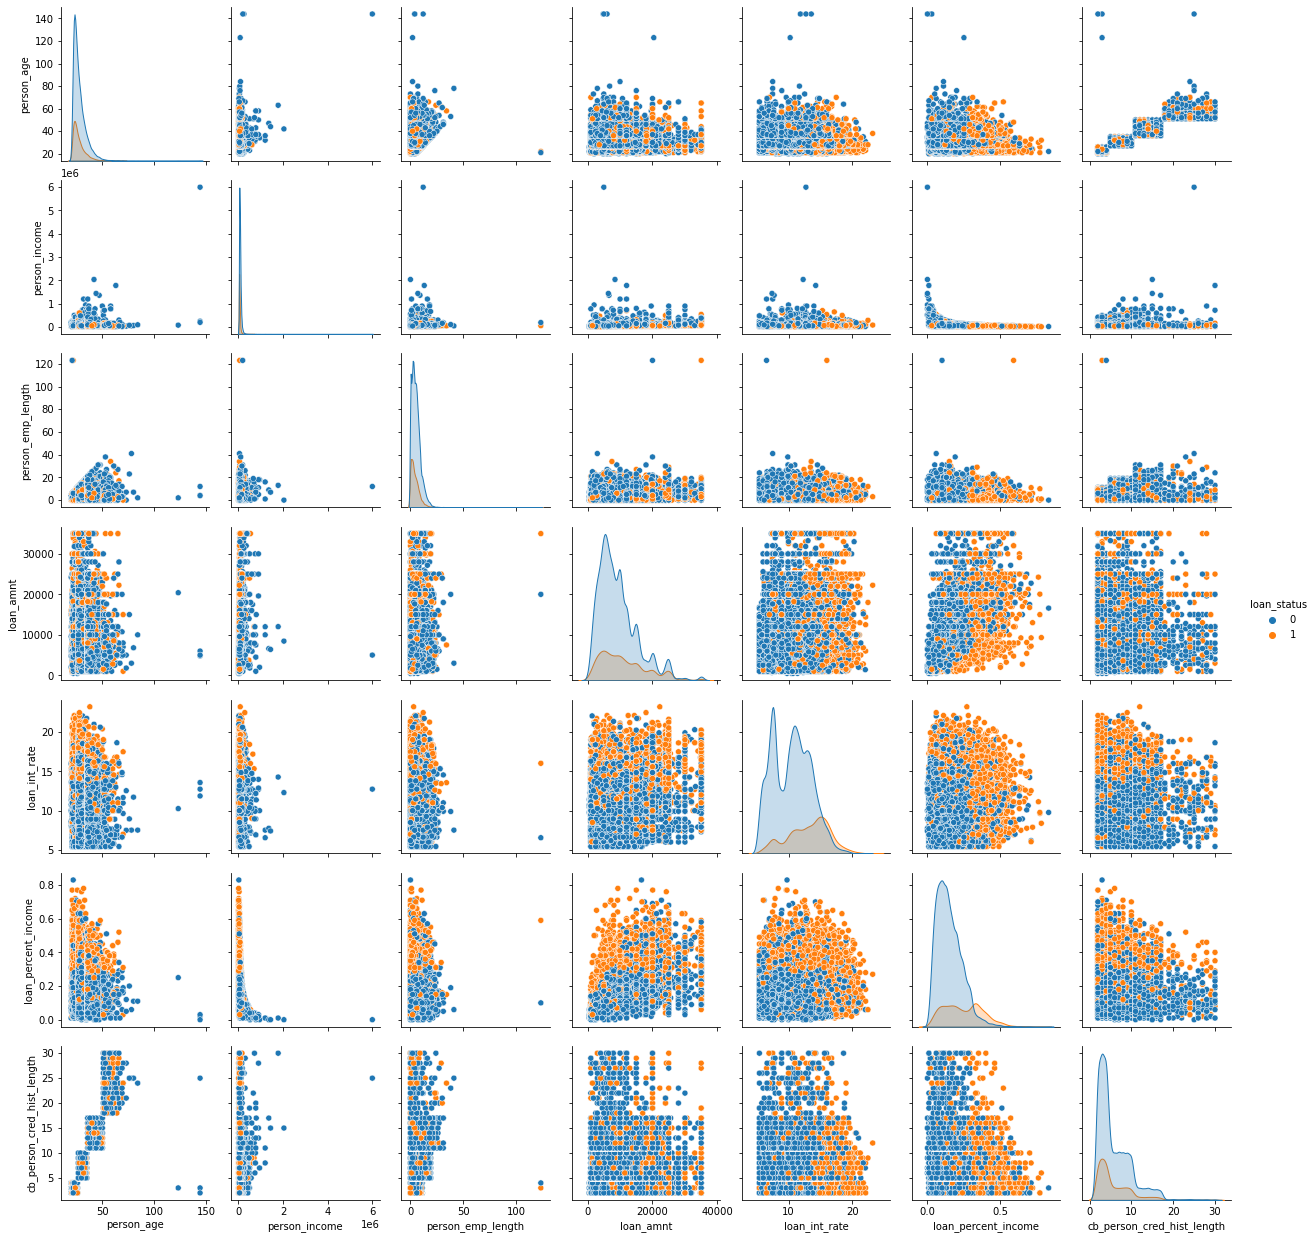

In [33]:
#Checking for correlations and patterns
sns.pairplot(df1, hue="loan_status")

<AxesSubplot:>

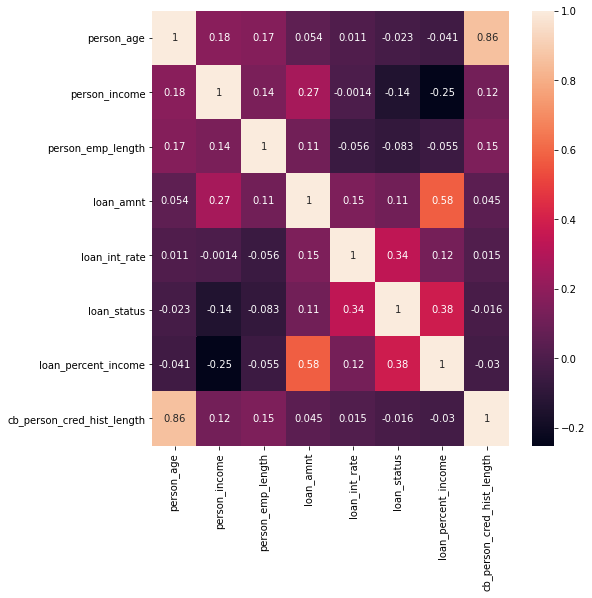

In [35]:
#looking for correlation
sns.heatmap(df1.corr(), annot=True)

<h2>Step 2 - Get Dummies, Split Data, Train and Fit model</h2>

In [37]:
#Get dummies
df1_ = pd.get_dummies(df1, drop_first=True)
df1_.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y,person_home_Ownership_OTHER,person_home_Ownership_OWN,person_home_Ownership_RENT
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,1,0,0,0,1,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,1,0,0,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,0,1,0,0,0,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,1,0,0,0,0,0,0,0,1
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,1,0,0,0,0,1,0,0,1


In [41]:
#Reshaping data and putting it in an array
y = np.array(df1_["loan_status"]).reshape(-1,1)
x = np.array(df1_.drop(columns={"loan_status"}))
x.shape, y.shape

((28638, 25), (28638, 1))

In [97]:
#Spliting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)
modelF = LogisticRegression().fit(x_train, y_train.ravel())

In [62]:
#checking the baseline Accuracy of our model
1-df1["loan_status"].mean()

0.783399678748516

In [117]:
#Checking to see our accuracy
score = modelF.score(x_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8077281191806331


<AxesSubplot:>

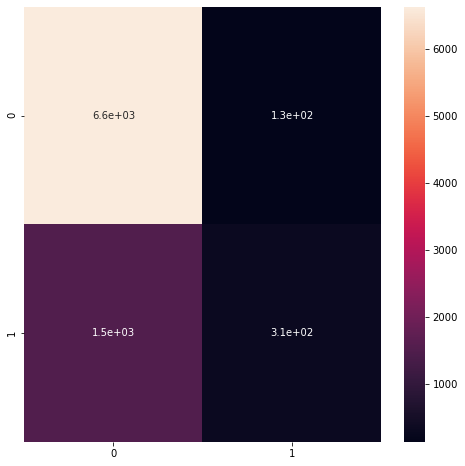

In [101]:
#Looking at prediction and comparing to our original values
y_preds = modelF.predict(x_test)
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, cbar="red", annot=True)

<h2>>>>>Is the Model good?</h2>

<b> - Judging by F1 Score: <b>


<l1>Since F1 score reaches its best value at 1, With an F1 Score of 0.81 we can say that our model is good


<b> - Judging by the outcome of Feature Scaling: <b>

<l1>We can also say that our model is good, given that our accuracy without doing the feature scalling is close to
<l1>accuracy after the feature scaling. 

<l1>Pre-scaling= 81 
<l1>After-Scaling = 77


In [116]:
# Lets check that out using the F1 score
print("F1 Score:", f1_score(y_test, y_preds, average='micro'))


F1 Score: 0.8077281191806331


In [105]:
df2x = df1.drop(columns={"loan_status"})
df2y = df1["loan_status"]

x2 = np.array(df2x)
y2 = np.array(df2y).reshape(-1,1)
x2.shape, y2.shape

((28638, 12), (28638, 1))

In [106]:
#splitting the Data
x2_train2, x2_test2, y2_train2, y2_test2 = train_test_split(x, y, test_size=0.33)

In [108]:
#creating scaler with the min/max scaler
scaler = MinMaxScaler()

In [109]:
x3 = scaler.fit_transform(x2_train2)
x2transform = scaler.transform(x2_test2)

In [111]:
#Training our scaled model
modelF2 = LogisticRegression().fit(x3,y2_train2.ravel())

#Making predictions with our scaled model
y2_preds2 = modelF2.predict(x2transform)

<AxesSubplot:>

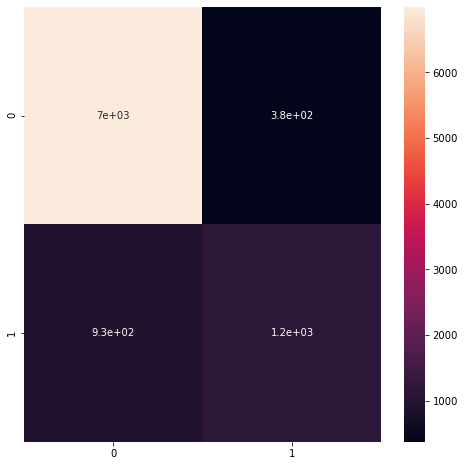

In [112]:
#results
cm2 = confusion_matrix(y2_test2, y2_preds2)
sns.heatmap(cm2, annot=True)


In [115]:
#Checking to see our accuracy
print("Accuracy:", modelF2.score(x2_test2, y2_test2))
print("F1 Score:", f1_score(y2_test2, y2_preds2, average='micro'))


Accuracy: 0.7694423870489895
F1 Score: 0.8622368003385885
